In [5]:
!gdown https://drive.google.com/uc?id=1g_n7kzDppAA2BNwUfit0eVKXLHRVBOw- -O src.png -q
!gdown https://drive.google.com/uc?id=1ywAx_GKGswFQjt3rWBLjdLtzjrjiOWpG -O bgr.png -q

In [1]:
!gdown https://drive.google.com/uc?id=1-t9SO--H4WmP7wUl1tVNNeDkq47hjbv4 -O model.pth -q

In [2]:
import torch
from torchvision.transforms.functional import to_tensor, to_pil_image
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
# device = torch.device('cuda:1')
# model = MattingRefine('resnet50',
#                           0.25,
#                           'sampling',
#                           80_000,
#                           0.7,
#                           3).to(device)

In [3]:
model = torch.jit.load('model.pth').cuda().eval()

In [4]:
# model = MattingBase('resnet50').cuda()
# model.load_state_dict(torch.load('./checkpoint/mattingrefine-resnet50-videomatte240k/epoch-0.pth'))

model.load_state_dict(torch.load('./checkpoint/mattingrefine-resnet50-videomatte240k/epoch-0.pth'), strict= True)
src = Image.open('test_src.png').convert('RGB')
bgr = Image.open('test_bgr.png').convert('RGB')
src = to_tensor(src).cuda().unsqueeze(0)
bgr = to_tensor(bgr).cuda().unsqueeze(0)
if src.size(2) <= 2048 and src.size(3) <= 2048:
  model.backbone_scale = 1/4
  model.refine_sample_pixels = 80_000
else:
  model.backbone_scale = 1/8
  model.refine_sample_pixels = 320_000
  
pha, fgr = model(src, bgr)[:2]
com = pha * fgr + (1 - pha) * torch.tensor([120/255, 255/255, 155/255], device='cuda').view(1, 3, 1, 1)

In [6]:
# to_pil_image(pha[0].cpu()).save('pha.png')
# to_pil_image(fgr[0].cpu()).save('fgr.png')
# to_pil_image(com[0].cpu()).save('com.png')

In [10]:

pha[0].permute(1,2,0).cpu().detach().numpy()

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

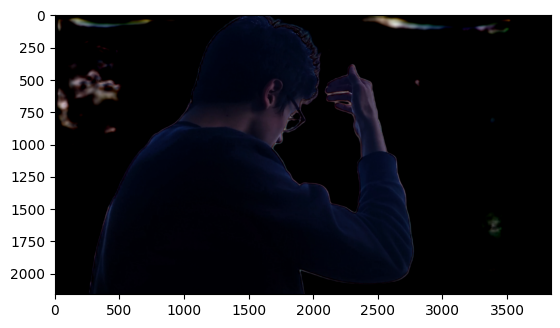

In [10]:
plt.imshow(fgr[0].permute(1,2,0).cpu().detach().numpy())
plt.show()